### 기울기 소실과 기울기 폭발의 원인

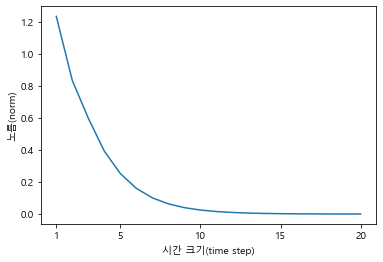

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

# Wh = np.random.randn(H, H)
Wh = np.random.randn(H, H)*0.5
# Wh = np.random.randn(H, H) * 0.7966

# print(Wh.T)

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)   # (2,3)(3,3) => (2,3)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

# print(norm_list)

# # 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

### 기울기 폭발 대책

In [18]:
import numpy as np


dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    print('total_norm=',total_norm)
    rate = max_norm / (total_norm + 1e-6)
    print(rate)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [6.81611779 5.41019673 7.07180601 2.63886671 9.26725684 8.39193058
 7.26319498 4.80239956 8.42103186]
total_norm= 27.61626959659911
0.18105268712914988
after: [1.23407644 0.97953066 1.28036948 0.47777391 1.67786175 1.51938158
 1.31502097 0.86948735 1.52465045]
